In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
flower = pd.read_csv("/content/drive/MyDrive/IRIS.csv")

In [ ]:
flower.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Data Preprocessing

In [ ]:
flower.shape

(150, 5)

In [ ]:
flower.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
flower.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
flower.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Data Visualization

<ipython-input-44-f647429c416e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(flower.corr(), annot=True).set(title='Heatmap\n')


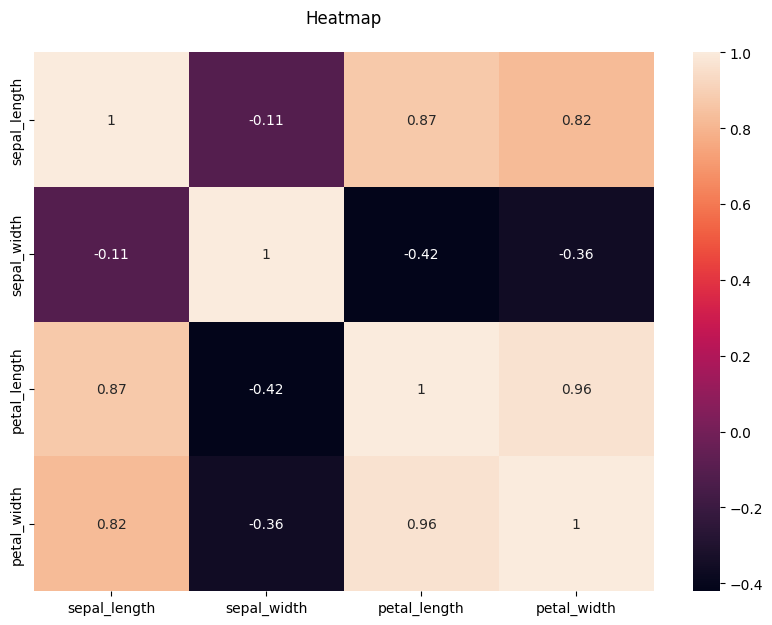

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(flower.corr(), annot=True).set(title='Heatmap\n')
sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)
plt.show()

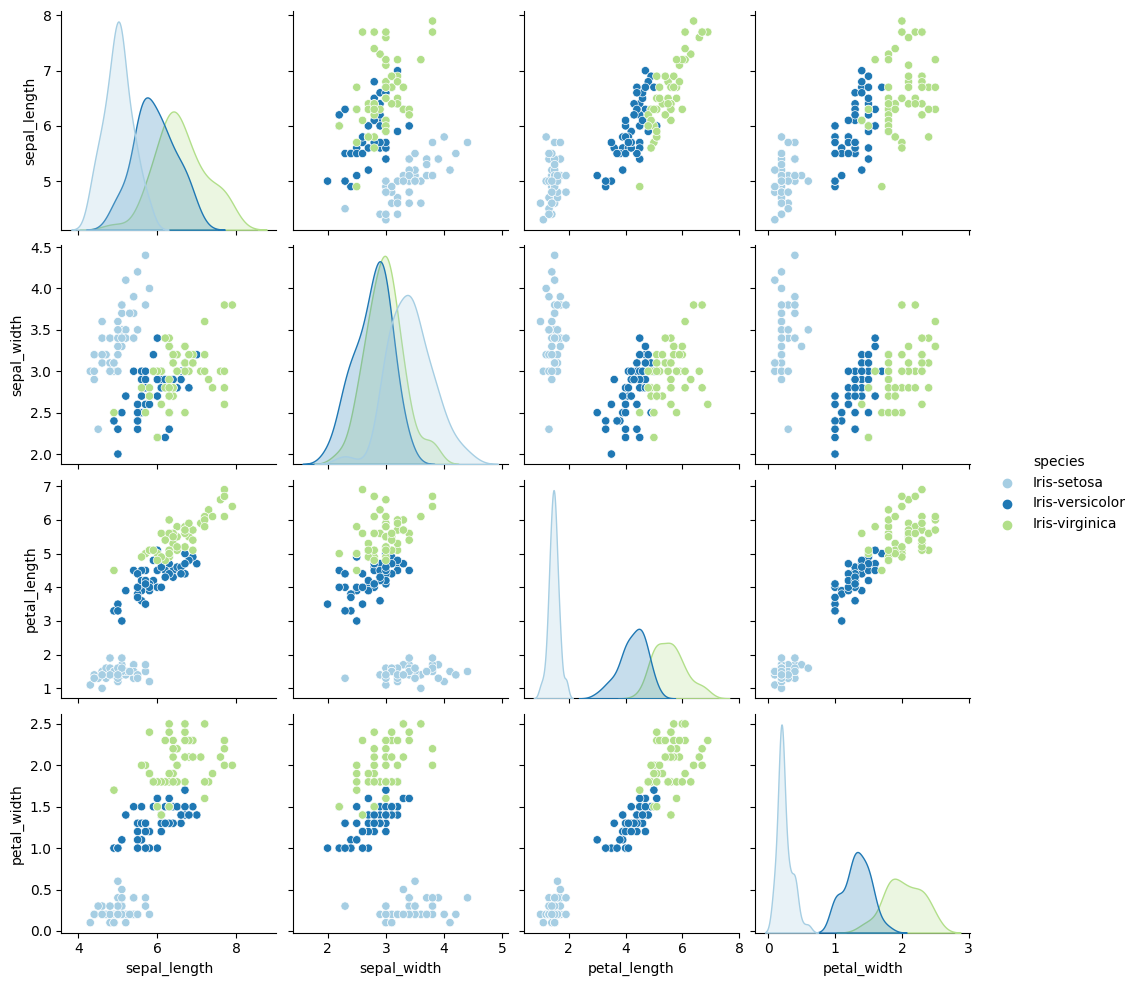

In [ ]:
sns.pairplot(flower, hue = 'species', palette = 'Paired')
plt.show()

# Label Encoding
   0 = setosa,
   1 = Versicolor,
   2 = Virginica




In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
flower['species'] = le.fit_transform(flower['species'])
flower.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Model Training

In [ ]:
from sklearn.model_selection import train_test_split
X = flower.drop(columns = ["species"])
Y = flower['species']
x_train, x_test,y_train, y_test = train_test_split(X ,Y ,test_size = 0.30)

In [ ]:
#logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = model.predict(x_test)
print(y_pred)


[2 0 1 0 0 0 0 1 2 1 0 1 0 1 0 0 2 0 0 0 1 2 0 1 1 1 1 2 1 1 2 1 0 0 2 1 2
 0 0 2 1 0 0 1 0]


In [ ]:
y_test.head(10)

118    2
40     0
52     1
27     0
49     0
4      0
3      0
84     1
133    2
93     1
Name: species, dtype: int64

In [ ]:
print("Accuracy: ",model.score(x_test, y_test)*100)

Accuracy:  97.77777777777777


# Model Predict

In [ ]:
a = model.predict([[5.8, 2.7,4.1, 1]])
a

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

The model that I had made is correct. As we can see the array gives value 1. That means its belong to Iris-Veriscolor species.


In [ ]:
#KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [ ]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = model.predict(x_test)
print(y_pred)

[2 0 1 0 0 0 0 1 2 1 0 1 0 1 0 0 2 0 0 0 1 2 0 1 2 1 1 2 1 1 2 1 0 0 2 1 2
 0 0 2 1 0 0 1 0]


In [ ]:
y_test.head(10)

118    2
40     0
52     1
27     0
49     0
4      0
3      0
84     1
133    2
93     1
Name: species, dtype: int64

In [ ]:
print("Accuracy: ",model.score(x_test, y_test)*100)

Accuracy:  95.55555555555556


# Model Predict

In [ ]:
a = model.predict([[5.7, 2.5,5, 2]])
a

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([2])

The model that I had made is correct. As we can see the array gives value 2. That means its belong to Iris-Virginica species.